C:\Users\meade\anaconda3\Lib\site-packages\pyogrio\core.py:35: RuntimeWarning: Could not detect GDAL data files.  Set GDAL_DATA environment variable to the correct path.
  _init_gdal_data()


  STATEFP20 COUNTYFP20 TRACTCE20 BLOCKCE20          GEOID20  \
0        25        005    640800      2016  250056408002016   
1        25        001    011802      1006  250010118021006   
2        25        005    610204      3009  250056102043009   
3        25        023    501101      3013  250235011013013   
4        25        023    541100      1024  250235411001024   

                  GEOIDFQ20      NAME20 MTFCC20 UR20 UACE20 FUNCSTAT20  \
0  1000000US250056408002016  Block 2016   G5040    U  72505          S   
1  1000000US250010118021006  Block 1006   G5040    U  05167          S   
2  1000000US250056102043009  Block 3009   G5040    U  72505          S   
3  1000000US250235011013013  Block 3013   G5040    U  09271          S   
4  1000000US250235411001024  Block 1024   G5040    R   None          S   

   ALAND20  AWATER20   INTPTLAT20    INTPTLON20  HOUSING20  POP20  \
0    18123         0  +41.6851722  -071.1478465         30     72   
1    14480         0  +41.7102851  -07

<Axes: >

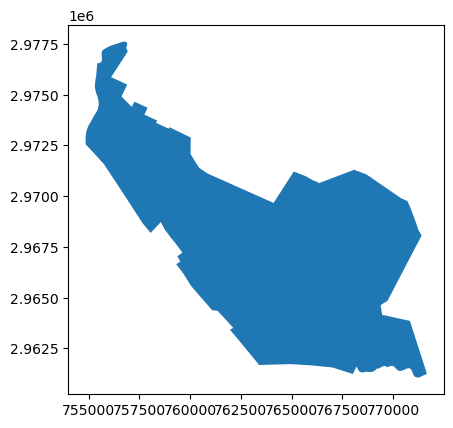

In [1]:
import geopandas as gpd
import pandas as pd
mainGitHub = 'https://raw.githubusercontent.com/meade68/DACSS_690D_Week09_HW2/main/'
BG = mainGitHub + "DATA/tl_2025_25_tabblock20.zip"
CRIMES= mainGitHub+ "DATA/Police_Data__Crime_Reports_20251101.csv"
somerville = mainGitHub + 'DATA/CityLimits.zip'

census_BG = gpd.read_file(f"{BG}")
somerville_bound = gpd.read_file(f"{somerville}")
crime_BG= pd.read_csv(f"{CRIMES}")

print(census_BG.head())
print(crime_BG.head())
somerville_bound.plot()

,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,GEOIDFQ20,NAME20,MTFCC20,UR20,UACE20,...,Day and Month Reported,Year Reported,Police Shift,Offense Code,Offense Type,Offense Definition,Offense Sub-Category,Offense Category,Block Code,Ward
0,25,017,351101,3005,250173511013005,1000000US250173511013005,Block 3005,G5040,U,09271,...,7/11,2017,Day Shift (8AM - 4PM),290,Destruction/Vandalism Property,"To willfully or maliciously destroy, damage, d...",Destruction/Vandalism Property,Crimes against Property,2.501735e+14,3
1,25,017,351101,3005,250173511013005,1000000US250173511013005,Block 3005,G5040,U,09271,...,9/10,2017,Day Shift (8AM - 4PM),240,Motor Vehicle Theft,A motor vehicle is a self-propelled vehicle th...,Motor Vehicle Theft,Crimes against Property,2.501735e+14,3
2,25,017,351101,3005,250173511013005,1000000US250173511013005,Block 3005,G5040,U,09271,...,11/29,2017,Day Shift (8AM - 4PM),"991, 998, 999",Other Criminal MV Offenses,Other Criminal MV Offenses represent select cr...,Other Criminal MV Offenses,Other,2.501735e+14,3
3,25,017,351101,3005,250173511013005,1000000US250173511013005,Block 3005,G5040,U,09271,...,5/18,2018,First Half (4PM - Midnight),35A,Drug/Narcotic Violations,"The unlawful cultivation, manufacture, distrib...",Drug/Narcotics Offenses,Crimes against Society,2.501735e+14,3
4,25,017,351101,3005,250173511013005,1000000US250173511013005,Block 3005,G5040,U,09271,...,5/30,2018,Day Shift (8AM - 4PM),23H,All Other Larceny,All thefts which do not fit any of the Larceny...,Larceny/Theft Offenses,Crimes against Property,2.501735e+14,3


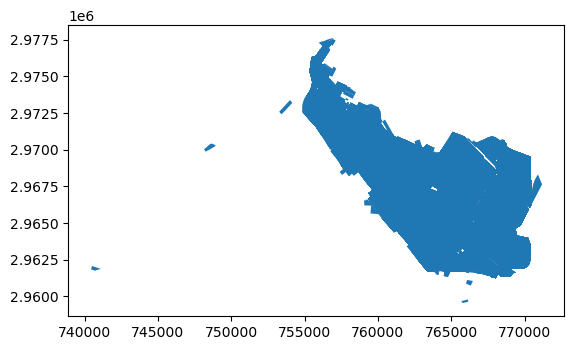

In [2]:

# Merge geodataframe and dataframe
census_BG = census_BG.dropna(subset=['GEOID20'])
crime_BG = crime_BG.dropna(subset=['Block Code'])

#filter any blocks where not middlesex county
census_BG = census_BG[census_BG['COUNTYFP20']=='017']

# Convert to numeric while handling errors
census_BG['GEOID20'] = pd.to_numeric(census_BG['GEOID20'], errors='coerce')
crime_BG['Block Code'] = pd.to_numeric(crime_BG['Block Code'], errors='coerce')

# Drop any rows where conversion resulted in NaN
census_BG = census_BG.dropna(subset=['GEOID20'])
crime_BG = crime_BG.dropna(subset=['Block Code'])

# Now merge the dataframes
census_BG_crime_BG = census_BG.merge(crime_BG, left_on="GEOID20", right_on="Block Code", how="inner")
census_BG_crime_BG = census_BG_crime_BG.to_crs(somerville_bound.crs)
census_BG_crime_BG.plot()
census_BG_crime_BG.head()


<Axes: >

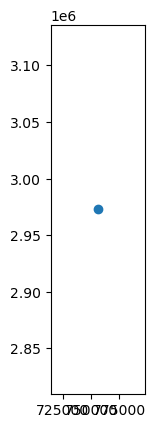

In [3]:
#nabbed the code from my instructor!
from geopy.geocoders import Nominatim
from shapely.geometry import Point

old_address='26 Garrison Ave, Somerville, MA 02144'

geolocator = Nominatim(user_agent="theGeocoder")

apt_Address = geolocator.geocode(old_address)

apt_old_gdf = gpd.GeoDataFrame(
    {'address': [apt_Address.address]},
    geometry=[Point(apt_Address.longitude, apt_Address.latitude)],
    crs="EPSG:4326" # because of lon/lat
)

# reprojecting
apt_old_gdf = apt_old_gdf.to_crs(somerville_bound.crs)

# here it is
apt_old_gdf.plot()

In [4]:
#Clip out blocks not in Somerville
census_BG_crime_BG=census_BG_crime_BG.clip(somerville_bound)

<Axes: >

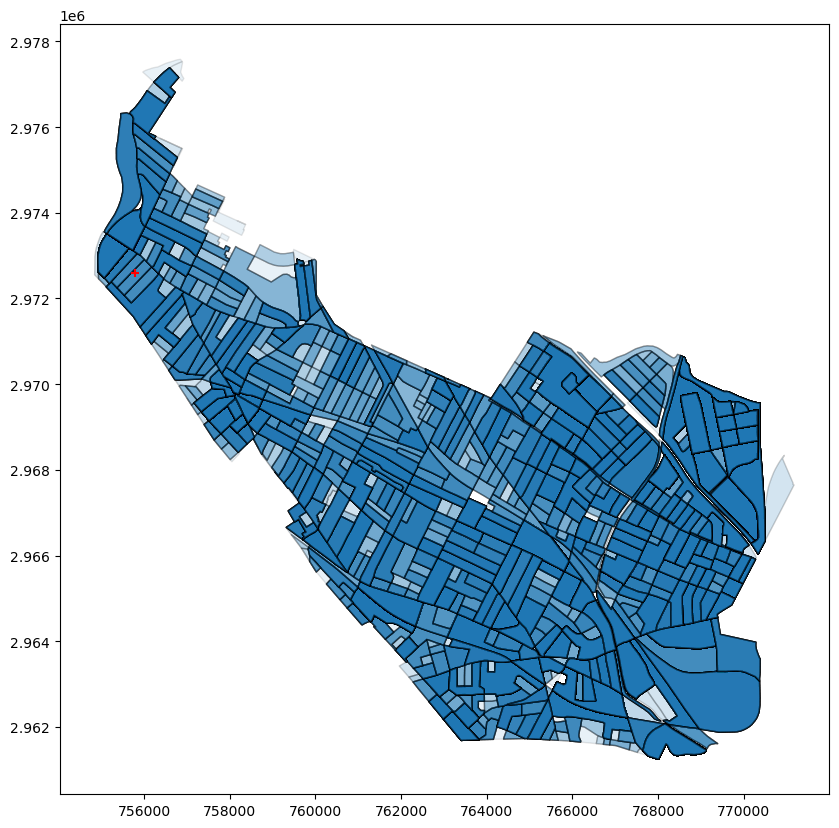

In [5]:
base=census_BG_crime_BG.plot(figsize=(10,10),alpha=0.1,edgecolor='black')
apt_old_gdf.plot(ax=base,marker="+",color='red')

In [6]:
census_BG_crime_BG.head()

,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,GEOIDFQ20,NAME20,MTFCC20,UR20,UACE20,...,Day and Month Reported,Year Reported,Police Shift,Offense Code,Offense Type,Offense Definition,Offense Sub-Category,Offense Category,Block Code,Ward
2238,25,017,351500,2007,250173515002007,1000000US250173515002007,Block 2007,G5040,U,09271,...,10/31,2022,Day Shift (8AM - 4PM),250,Counterfeiting/Forgery,"The altering, copying, or imitating of somethi...",Counterfeiting/Forgery,Crimes against Property,2.501735e+14,2
2242,25,017,351500,2007,250173515002007,1000000US250173515002007,Block 2007,G5040,U,09271,...,7/19,2024,First Half (4PM - Midnight),"991, 998, 999",Other Criminal MV Offenses,Other Criminal MV Offenses represent select cr...,Other Criminal MV Offenses,Other,2.501735e+14,2
2243,25,017,351500,2007,250173515002007,1000000US250173515002007,Block 2007,G5040,U,09271,...,12/23,2024,First Half (4PM - Midnight),"991, 998, 999",Other Criminal MV Offenses,Other Criminal MV Offenses represent select cr...,Other Criminal MV Offenses,Other,2.501735e+14,2
2244,25,017,351500,2007,250173515002007,1000000US250173515002007,Block 2007,G5040,U,09271,...,5/24,2025,Day Shift (8AM - 4PM),240,Motor Vehicle Theft,A motor vehicle is a self-propelled vehicle th...,Motor Vehicle Theft,Crimes against Property,2.501735e+14,2
2232,25,017,351500,2007,250173515002007,1000000US250173515002007,Block 2007,G5040,U,09271,...,9/21,2020,Day Shift (8AM - 4PM),23H,All Other Larceny,All thefts which do not fit any of the Larceny...,Larceny/Theft Offenses,Crimes against Property,2.501735e+14,2


In [7]:
crime_like = ['Crimes against Person']
census_BG_crime_BG['person_c_count']= census_BG_crime_BG['Offense Category'].isin(crime_like).astype(int)
crime_like = ['Crimes against Property']
census_BG_crime_BG['property_c_count']= census_BG_crime_BG['Offense Category'].isin(crime_like).astype(int)

In [8]:
census_BG_crime_BG

,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,GEOIDFQ20,NAME20,MTFCC20,UR20,UACE20,...,Police Shift,Offense Code,Offense Type,Offense Definition,Offense Sub-Category,Offense Category,Block Code,Ward,person_c_count,property_c_count
2238,25,017,351500,2007,250173515002007,1000000US250173515002007,Block 2007,G5040,U,09271,...,Day Shift (8AM - 4PM),250,Counterfeiting/Forgery,"The altering, copying, or imitating of somethi...",Counterfeiting/Forgery,Crimes against Property,2.501735e+14,2,0,1
2242,25,017,351500,2007,250173515002007,1000000US250173515002007,Block 2007,G5040,U,09271,...,First Half (4PM - Midnight),"991, 998, 999",Other Criminal MV Offenses,Other Criminal MV Offenses represent select cr...,Other Criminal MV Offenses,Other,2.501735e+14,2,0,0
2243,25,017,351500,2007,250173515002007,1000000US250173515002007,Block 2007,G5040,U,09271,...,First Half (4PM - Midnight),"991, 998, 999",Other Criminal MV Offenses,Other Criminal MV Offenses represent select cr...,Other Criminal MV Offenses,Other,2.501735e+14,2,0,0
2244,25,017,351500,2007,250173515002007,1000000US250173515002007,Block 2007,G5040,U,09271,...,Day Shift (8AM - 4PM),240,Motor Vehicle Theft,A motor vehicle is a self-propelled vehicle th...,Motor Vehicle Theft,Crimes against Property,2.501735e+14,2,0,1
2232,25,017,351500,2007,250173515002007,1000000US250173515002007,Block 2007,G5040,U,09271,...,Day Shift (8AM - 4PM),23H,All Other Larceny,All thefts which do not fit any of the Larceny...,Larceny/Theft Offenses,Crimes against Property,2.501735e+14,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12821,25,017,350702,1008,250173507021008,1000000US250173507021008,Block 1008,G5040,U,09271,...,Last Half (Midnight - 8AM),220,Burglary/Breaking And Entering,The unlawful entry into a building or some oth...,Burglary/Breaking And Entering,Crimes against Property,2.501735e+14,7,0,1
12823,25,017,350702,1008,250173507021008,1000000US250173507021008,Block 1008,G5040,U,09271,...,Day Shift (8AM - 4PM),240,Motor Vehicle Theft,A motor vehicle is a self-propelled vehicle th...,Motor Vehicle Theft,Crimes against Property,2.501735e+14,7,0,1
12826,25,017,350702,1008,250173507021008,1000000US250173507021008,Block 1008,G5040,U,09271,...,Day Shift (8AM - 4PM),240,Motor Vehicle Theft,A motor vehicle is a self-propelled vehicle th...,Motor Vehicle Theft,Crimes against Property,2.501735e+14,7,0,1
12827,25,017,350702,1008,250173507021008,1000000US250173507021008,Block 1008,G5040,U,09271,...,Day Shift (8AM - 4PM),240,Motor Vehicle Theft,A motor vehicle is a self-propelled vehicle th...,Motor Vehicle Theft,Crimes against Property,2.501735e+14,7,0,1


In [9]:
#dissolve

dissolved = census_BG_crime_BG.dissolve(by='GEOID20', aggfunc={'person_c_count': 'sum', 'property_c_count': 'sum','POP20':'mean'})
dissolved['person_c_count_p_capita']=dissolved['person_c_count']/dissolved['POP20']
dissolved['property_c_count_p_capita']=dissolved['property_c_count']/dissolved['POP20']
dissolved.head(10)

,geometry,person_c_count,property_c_count,POP20,person_c_count_p_capita,property_c_count_p_capita
GEOID20,,,,,,
250173394004008,"POLYGON ((756884.177 2975503.071, 756426.597 2...",0,1,36.0,0.000000,0.027778
250173394004009,"POLYGON ((756778.702 2975291.24, 756868.918 29...",0,0,95.0,0.000000,0.000000
250173395001019,"MULTIPOLYGON (((760034.488 2972056.294, 760049...",0,2,83.0,0.000000,0.024096
250173395001028,"MULTIPOLYGON (((758320.62 2973609.998, 758322....",0,0,332.0,0.000000,0.000000
250173396003007,"POLYGON ((760877.994 2971104.694, 760864.733 2...",0,1,149.0,0.000000,0.006711
250173396005014,"POLYGON ((762797.53 2970250.134, 762820.45 297...",0,1,77.0,0.000000,0.012987
250173396006004,"POLYGON ((763111.658 2970110.273, 763080.115 2...",1,8,79.0,0.012658,0.101266
250173396006006,"MULTIPOLYGON (((763736.835 2969831.922, 763736...",0,2,151.0,0.000000,0.013245
250173396006009,"MULTIPOLYGON (((763942.887 2969743.931, 763981...",0,2,58.0,0.000000,0.034483


<Axes: >

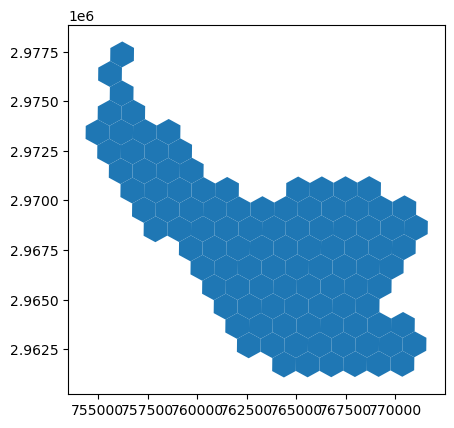

In [10]:
#create grids
from tobler.util import h3fy as h3
somerville_grid8=h3(somerville_bound.to_crs(4326), resolution=9).to_crs(somerville_bound.crs)
somerville_grid8.plot()

In [11]:
#begin areal analyes
from tobler.area_weighted  import area_interpolate as interpolate

myExtensive=['person_c_count','property_c_count']
myIntensive=['person_c_count_p_capita','property_c_count_p_capita']


areal_somerville = interpolate(
    source_df=dissolved,
    target_df=somerville_grid8,
    extensive_variables=myExtensive,
    intensive_variables=myIntensive
)

areal_somerville

C:\Users\meade\anaconda3\Lib\site-packages\tobler\util\util.py:60: UserWarning: nan values in variable: person_c_count_p_capita, replacing with 0
  warn(f"nan values in variable: {column}, replacing with 0")
C:\Users\meade\anaconda3\Lib\site-packages\tobler\util\util.py:73: UserWarning: inf values in variable: person_c_count_p_capita, replacing with 0
  warn(f"inf values in variable: {column}, replacing with 0")
C:\Users\meade\anaconda3\Lib\site-packages\tobler\util\util.py:60: UserWarning: nan values in variable: property_c_count_p_capita, replacing with 0
  warn(f"nan values in variable: {column}, replacing with 0")
C:\Users\meade\anaconda3\Lib\site-packages\tobler\util\util.py:73: UserWarning: inf values in variable: property_c_count_p_capita, replacing with 0
  warn(f"inf values in variable: {column}, replacing with 0")


,person_c_count,property_c_count,person_c_count_p_capita,property_c_count_p_capita,geometry
hex_id,,,,,
892a3067513ffff,20.043407,101.271960,0.004831,0.094742,"POLYGON ((762075.473 2968242.883, 761474.65 29..."
892a306666fffff,24.504905,207.554734,0.051426,0.356976,"POLYGON ((767395.596 2964027.036, 766802.749 2..."
892a30674abffff,2.585595,30.762870,0.001699,0.018632,"POLYGON ((759134.33 2971819.913, 759735.185 29..."
892a3067477ffff,5.171626,51.856514,0.008871,0.079094,"POLYGON ((755544.947 2971145.106, 756137.954 2..."
892a306740fffff,5.692942,104.507163,0.006543,0.099358,"POLYGON ((756762.318 2973113.067, 756161.459 2..."
...,...,...,...,...,...
892a3067533ffff,7.766689,99.598841,0.054676,0.422482,"POLYGON ((763229.678 2964982.429, 762636.787 2..."
892a306665bffff,27.521877,176.559913,0.034996,0.221286,"POLYGON ((766265.473 2969247.955, 765664.632 2..."
892a3066627ffff,0.002280,0.047888,0.000000,0.000000,"POLYGON ((771561.292 2963071.695, 770968.489 2..."


<Axes: >

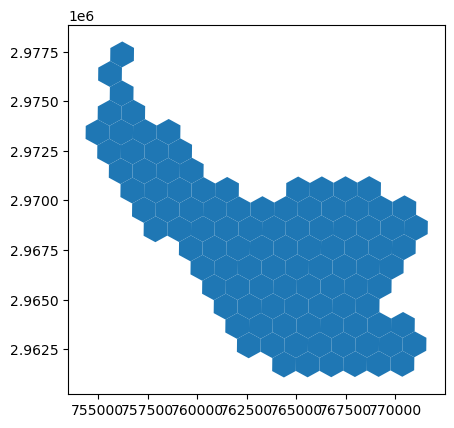

In [17]:
#check shape
areal_somerville.describe()
areal_somerville.plot()

In [13]:
#Classify
import mapclassify
import numpy as np

np.random.seed(1) 

K=3
theVar1=areal_somerville['person_c_count_p_capita']

# based on similarity, good for skewed data
fj_person_c = mapclassify.FisherJenks(theVar1, k=K)
pd.Series(fj_person_c.yb).value_counts().sort_index()

0    100
1      5
2      1
Name: count, dtype: int64

In [14]:
theVar2=areal_somerville['property_c_count_p_capita']
np.random.seed(1) 

K=3

# based on similarity, good for skewed data
fj_property_c = mapclassify.FisherJenks(theVar2, k=K)
pd.Series(fj_property_c.yb).value_counts().sort_index()

0    101
1      4
2      1
Name: count, dtype: int64

In [15]:
#make scales
newLabelsForLevels={0:"0_NoRisk", 1:"1_MediumRisk", 2:"2_HighRisk"}

areal_somerville['person_c_bin']=fj_person_c.yb
areal_somerville.replace({'person_c_bin':newLabelsForLevels},inplace=True)

areal_somerville['property_c_bin']=fj_property_c.yb
areal_somerville.replace({'property_c_bin':newLabelsForLevels},inplace=True)


areal_somerville.head(20)

,person_c_count,property_c_count,person_c_count_p_capita,property_c_count_p_capita,geometry,person_c_bin,property_c_bin
hex_id,,,,,,,
892a3067513ffff,20.043407,101.271960,0.004831,0.094742,"POLYGON ((762075.473 2968242.883, 761474.65 29...",0_NoRisk,0_NoRisk
892a306666fffff,24.504905,207.554734,0.051426,0.356976,"POLYGON ((767395.596 2964027.036, 766802.749 2...",0_NoRisk,0_NoRisk
892a30674abffff,2.585595,30.762870,0.001699,0.018632,"POLYGON ((759134.33 2971819.913, 759735.185 29...",0_NoRisk,0_NoRisk
892a3067477ffff,5.171626,51.856514,0.008871,0.079094,"POLYGON ((755544.947 2971145.106, 756137.954 2...",0_NoRisk,0_NoRisk
892a306740fffff,5.692942,104.507163,0.006543,0.099358,"POLYGON ((756762.318 2973113.067, 756161.459 2...",0_NoRisk,0_NoRisk
892a30662c7ffff,2.633309,78.883759,0.006198,0.092044,"POLYGON ((764976.599 2961399.184, 765569.434 2...",0_NoRisk,0_NoRisk
892a30666d7ffff,10.374651,170.319853,0.058664,0.366746,"POLYGON ((770455.513 2970253.036, 769854.654 2...",0_NoRisk,0_NoRisk
892a3066293ffff,1.282806,26.147875,0.002871,0.055985,"POLYGON ((769166.12 2962404.105, 769174.09 296...",0_NoRisk,0_NoRisk
892a30675d3ffff,5.922994,85.430772,0.007547,0.098469,"POLYGON ((760905.369 2970196.502, 761498.322 2...",0_NoRisk,0_NoRisk


In [23]:
census_BG_crime_BG.to_file('somerville_crime.gpkg',driver='GPKG',layer='census_BG_crime_BG')
areal_somerville.to_file('somerville_crime.gpkg',driver='GPKG',layer='areal_somerville')
apt_old_gdf.to_file('somerville_crime.gpkg',driver='GPKG',layer='apt_old')
somerville_bound.to_file('somerville_crime.gpkg',driver='GPKG',layer='apt_old')